# Divisibility by 3

Given an infinite stream of digits of a number, for each digit find if the resuktant number is divible by 3 or not.

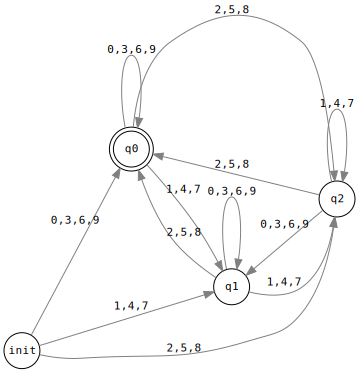

In [1]:
from graphviz import Source
with open("./div3.dot", "r") as f:
    gr = Source(f.read())
gr

In [2]:
def prime(fn):
    def wrapper(*args, **kwargs):
        v = fn(*args, **kwargs)
        v.send(None)
        return v
    return wrapper

In [3]:
class Divisibility3FSM:
    def __init__(self):
        self.current_state = None
        
        self.state_init = self._create_state_init()
        self.state_q0 = self._create_state_q0()
        self.state_q1 = self._create_state_q1()
        self.state_q2 = self._create_state_q2()
        
        self.current_state = self.state_init
        
    def send(self, digit):
        self.current_state.send(digit)
        
    def is_divisible(self):
        return self.current_state == self.state_q0

    @prime
    def _create_state_q0(self):
        while True:
            digit = yield
            if  digit in [0, 3, 6, 9]:
                self.current_state = self.state_q0
            elif  digit in [1, 4, 7]:
                self.current_state = self.state_q1
            elif  digit in [2, 5, 8]:
                self.current_state = self.state_q2

    @prime
    def _create_state_q1(self):
        while True:
            digit = yield
            if  digit in [0, 3, 6, 9]:
                self.current_state = self.state_q1
            elif  digit in [1, 4, 7]:
                self.current_state = self.state_q2
            elif  digit in [2, 5, 8]:
                self.current_state = self.state_q0

    @prime
    def _create_state_q2(self):
        while True:
            digit = yield
            if  digit in [0, 3, 6, 9]:
                self.current_state = self.state_q0
            elif  digit in [1, 4, 7]:
                self.current_state = self.state_q1
            elif  digit in [2, 5, 8]:
                self.current_state = self.state_q2

    @prime
    def _create_state_init(self):
        while True:
            digit = yield
            if  digit in [0, 3, 6, 9]:
                self.current_state = self.state_q0
            elif  digit in [1, 4, 7]:
                self.current_state = self.state_q1
            elif  digit in [2, 5, 8]:
                self.current_state = self.state_q2

In [4]:
@prime
def is_divisible_by_3():
    number = ""
    evaluator = Divisibility3FSM()
    while True:
        digit = yield
        number = str(digit) + number
        evaluator.send(digit)
        print(number, evaluator.is_divisible())

In [5]:
import random

gen = is_divisible_by_3()
for i in range(50):
    digit = random.randint(0, 9)
    gen.send(digit)

2 False
92 True
992 True
4992 False
84992 True
384992 True
5384992 False
25384992 False
125384992 False
1125384992 False
41125384992 False
841125384992 True
7841125384992 False
77841125384992 False
177841125384992 False
6177841125384992 False
86177841125384992 True
486177841125384992 False
5486177841125384992 True
95486177841125384992 True
695486177841125384992 True
4695486177841125384992 False
44695486177841125384992 False
244695486177841125384992 False
2244695486177841125384992 False
92244695486177841125384992 True
992244695486177841125384992 True
2992244695486177841125384992 False
82992244695486177841125384992 False
482992244695486177841125384992 False
2482992244695486177841125384992 True
32482992244695486177841125384992 True
732482992244695486177841125384992 False
3732482992244695486177841125384992 False
83732482992244695486177841125384992 True
083732482992244695486177841125384992 True
7083732482992244695486177841125384992 False
07083732482992244695486177841125384992 False
90708373